<a href="https://colab.research.google.com/github/anner-paldor/geodata_course/blob/main/HW2/HW2-Stats_Philly_Parks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2 : Summary statistics - For GEOG271

**By Emmanuel Chinkaka**


This homework performs strictly an exploratory analysis of the data

Consult the class demo noteboo for more: https://github.com/EmmanuelChinkaka/W23-GEOG271/blob/main/Class_Demo/Descriptive_Stats.ipynb 


**important**
turn in the notebook by uploading it to your github repository in a folder called HW2. Before you upload the notebook make sure you 
- click above: Runtime -> Restart and run all

this will assure that your notebook has no bugs due to running the cells of code out of order.


**This assigment explores the Philadephia parks data**

In [1]:
# Importing package

import pandas as pd
import pylab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Read in the data about the Philly parks**

you can find the data at http://data-phl.opendata.arcgis.com/datasets/d52445160ab14380a673e5849203eb64_0.csv
**Copy the URL above and use it to load the data**

In [2]:
# Reading the Phylly's park data from the URL baove
pparks = pd.read_csv('http://data-phl.opendata.arcgis.com/datasets/d52445160ab14380a673e5849203eb64_0.csv')

In [ ]:
# get the info and the statistical description of the dataframe
pparks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   OBJECTID                 514 non-null    int64  
 1   PUBLIC_NAME              514 non-null    object 
 2   PARENT_NAME              514 non-null    object 
 3   NESTED                   514 non-null    object 
 4   OFFICIAL_NAME            285 non-null    object 
 5   LABEL                    512 non-null    object 
 6   ALIAS                    353 non-null    object 
 7   DPP_ASSET_ID             514 non-null    int64  
 8   ADDRESS_911              506 non-null    object 
 9   ZIP_CODE                 514 non-null    int64  
 10  ADDRESS_BRT              430 non-null    object 
 11  ALIAS_ADDRESS            427 non-null    object 
 12  ACREAGE                  514 non-null    float64
 13  PROPERTY_CLASSIFICATION  514 non-null    object 
 14  PPR_USE                  5

In [ ]:
# show the shape of the parks file dataframe
pparks.shape

(514, 25)

In [ ]:
# show the column names in the dataframe
pparks.columns

Index(['OBJECTID', 'PUBLIC_NAME', 'PARENT_NAME', 'NESTED', 'OFFICIAL_NAME',
       'LABEL', 'ALIAS', 'DPP_ASSET_ID', 'ADDRESS_911', 'ZIP_CODE',
       'ADDRESS_BRT', 'ALIAS_ADDRESS', 'ACREAGE', 'PROPERTY_CLASSIFICATION',
       'PPR_USE', 'PPR_DISTRICT', 'PPR_OPS_DISTRICT', 'COUNCIL_DISTRICT',
       'POLICE_DISTRICT', 'CITY_SCALE_MAPS', 'LOCAL_SCALE_MAPS',
       'PROGRAM_SITES', 'COMMENTS', 'Shape__Area', 'Shape__Length'],
      dtype='object')

In [ ]:
# show the beginning of the dataframe (the first 5 rows)
pparks.head()

,OBJECTID,PUBLIC_NAME,PARENT_NAME,NESTED,OFFICIAL_NAME,LABEL,ALIAS,DPP_ASSET_ID,ADDRESS_911,ZIP_CODE,...,PPR_DISTRICT,PPR_OPS_DISTRICT,COUNCIL_DISTRICT,POLICE_DISTRICT,CITY_SCALE_MAPS,LOCAL_SCALE_MAPS,PROGRAM_SITES,COMMENTS,Shape__Area,Shape__Length
0,1,Eastwick Regional Playground,Eastwick Regional Playground,N,Eastwick Regional Playground,Eastwick Regional,NaN,499,7899 MERCURY PL,19153,...,NaN,8,2,12,Y,Y,Y,NaN,159370.914062,3781.877533
1,2,Whitby Avenue Playground,Cobbs Creek Park,Y,NaN,Whitby,,1372,1300 COBBS CREEK PKY,19143,...,NaN,8,3,12,Y,Y,Y,NaN,38916.484375,949.498194
2,3,29th and Passyunk Park,29th and Passyunk Park,N,NaN,29th and Passyunk,,432,2827 W PASSYUNK AVE,19145,...,NaN,7,2,1,Y,Y,Y,NaN,3830.242188,247.032048
3,4,Price Street Play Lot,Price Street Play Lot,N,NaN,Price St,,826,185 W PRICE ST,19144,...,NaN,4,8,14,Y,Y,N,NaN,1249.839844,143.734003
4,5,Sedgley Woods Disc Golf Course,East Fairmount Park,Y,NaN,Sedgley Woods,,3013,3400 RESERVOIR DR,19121,...,NaN,5,4,22,Y,Y,N,NaN,210135.566406,1984.375466


In [ ]:
# show the end of the dataframe (the last 5 rows)
pparks.tail()

,OBJECTID,PUBLIC_NAME,PARENT_NAME,NESTED,OFFICIAL_NAME,LABEL,ALIAS,DPP_ASSET_ID,ADDRESS_911,ZIP_CODE,...,PPR_DISTRICT,PPR_OPS_DISTRICT,COUNCIL_DISTRICT,POLICE_DISTRICT,CITY_SCALE_MAPS,LOCAL_SCALE_MAPS,PROGRAM_SITES,COMMENTS,Shape__Area,Shape__Length
509,524,Tacony Creek Park,Tacony Creek Park,N,Tacony Creek Park,Tacony Creek Park,Brookwood Park,1961,NaN,19120,...,NaN,3,"7, 9","2, 15, 24, 25, 35",Y,Y,N,NaN,1.385218e+06,19003.764664
510,525,Franklin Delano Roosevelt Park,Franklin Delano Roosevelt Park,N,Franklin Delano Roosevelt (FDR) Park,FDR Park,League Island Park;The Lakes;FDR Park,231,3500 S BROAD ST,19145,...,NaN,7,2,1,Y,Y,N,NaN,2.388505e+06,6568.830576
511,526,Hunting Park,Hunting Park,N,NaN,Hunting,NaN,845,1101 W HUNTING PARK AVE,19140,...,NaN,3,5,25,Y,Y,Y,NaN,4.911561e+05,4036.792375
512,527,Awbury Park and Recreation Center,Awbury Park and Recreation Center,N,Awbury Park and Recreation Center,Awbury,NaN,604,6101 ARDLEIGH ST,19138,...,NaN,4,8,14,Y,Y,Y,Review the parcel boundaries,1.930695e+05,2019.278021
513,528,Fisher Park,Fisher Park,N,Fisher Park,Fisher,NaN,679,572 W SPENCER ST,19120,...,NaN,3,9,35,Y,Y,Y,NaN,1.693630e+05,1798.578647


## meausre the central tendency of the Philly park sizes
measure the mean and the median and compare them

In [3]:
meanps = pparks['ACREAGE'].mean()
medps = pparks['ACREAGE'].median()

In [4]:
# show the mean and median sizes of the dataframe 
# are they the same? 
if(meanps == medps):
  print('The median and the mean are the same')
else:
    print('The median is different than the mean')

# Printing the mean and median
print('The Mean is', meanps.round(1),'\nThe Median is', medps.round(1))



The median is different than the mean
The Mean is 19.7 
The Median is 3.4


1. what can you conclude from the values of the mean and median you extracted? (discuss in a text cell below)

2. What can you say about the distribution of the ACREAGE variable in the data? 





The mean is ~6 times higher than the median, which tells us that in the data there are a few very large values that "pull" the mean upward, although the majority of the data entries have values that are low compared to the outliers. An assymetric distribution (right side more acceuntated). 

hint: to plot a line over the histogram use pl.axvline(x=myx) and pass to this function the x value corresponding to the mean and to the median (in my example that would be called myx). As a default, this will plot a line that spanns the whole y range

hint: you can import the plotting package matplotlib.pylab and call pylab functions as 
```pl.plot()```
```pl.axvline()```
```pl.xlabel```

or you can create a figure with the first command starting from the pandas dataframe as
```ax = pparks["ACREAGE"].hist()```

and then use methods specific of the axis object ```ax```: ```ax.plot()``` ```ax.axvline()``` ```ax.set_xlabel```

most of the commands are the same or have small differences (e.g. ```ax.set_xlabel``` instead of ```pl.xlabel```)

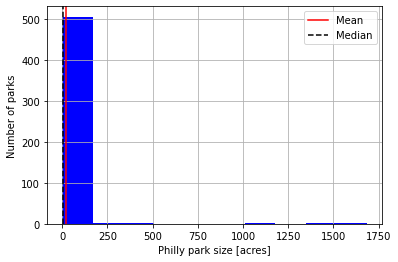

In [5]:
# visualize a histogram of the park size. 
# you can use the method of the ACREAGE column .hist()
# choose an appropriate number of bins with the argument bins=
# overplot on the histogram the mean and the median of the distribution
pparks['ACREAGE'].hist(color='b')
plt.gca().axvline(meanps, c='r', label='Mean')
plt.gca().axvline(medps, c='k', linestyle='--', label='Median')
plt.gca().set_xlabel('Philly park size [acres]')
plt.gca().set_ylabel('Number of parks')
plt.legend()
#to get the legend to render pass to axvline the argument label="..." with ... being whatever you want displayed


3. Describe what the graph mean



As said above, we see the outliers in the very high values (>250 acres) that pull the mean (red line) to be higher that the median (dashed black). But the majority of the data is 0<=x<250, as the highest bin suggests.

## 4. what is the spread of park sizes?
calculate the standard deviation of the park sized

Remember to manage the decimal places

In [6]:
#Calculating the standard deviation of the park sizes
stdps = pparks['ACREAGE'].std()
print("The standard deviation of the park sizes is", stdps.round(1))

The standard deviation of the park sizes is 110.6


### 5. select only a subset of the parks: the pasks smaller than 10 acres
(you can do it similarly to the way we removed "Unknown" from the criminal arrests data in class: set a condition and use it to index the dataframe)

calculate the mean and median and plot a histogram of the park sized with the mean and median indicated on the plot

In [7]:
# if you need help with this step do ask me about boolean arrays used as indices
# and slicing of arrays and series! remember we have a slack channel #hw3

ax = pparks[~(pparks["ACREAGE"]=="Unknown")]["ACREAGE"].unique()
smallparks = pparks.loc[pparks['ACREAGE'] < 10]
smallparks.head()

,OBJECTID,PUBLIC_NAME,PARENT_NAME,NESTED,OFFICIAL_NAME,LABEL,ALIAS,DPP_ASSET_ID,ADDRESS_911,ZIP_CODE,...,PPR_DISTRICT,PPR_OPS_DISTRICT,COUNCIL_DISTRICT,POLICE_DISTRICT,CITY_SCALE_MAPS,LOCAL_SCALE_MAPS,PROGRAM_SITES,COMMENTS,Shape__Area,Shape__Length
1,2,Whitby Avenue Playground,Cobbs Creek Park,Y,NaN,Whitby,,1372,1300 COBBS CREEK PKY,19143,...,NaN,8,3,12,Y,Y,Y,NaN,38916.484375,949.498194
2,3,29th and Passyunk Park,29th and Passyunk Park,N,NaN,29th and Passyunk,,432,2827 W PASSYUNK AVE,19145,...,NaN,7,2,1,Y,Y,Y,NaN,3830.242188,247.032048
3,4,Price Street Play Lot,Price Street Play Lot,N,NaN,Price St,,826,185 W PRICE ST,19144,...,NaN,4,8,14,Y,Y,N,NaN,1249.839844,143.734003
5,6,Robert Wilson III Park,Cobbs Creek Park,Y,Robert Wilson III Park,Wilson,61st and Baltimore Ave Playground,3454,6100 BALTIMORE AVE,19143,...,NaN,8,3,12,Y,Y,Y,1911 Ordinance assigned to Department of Rec,8015.187500,360.391789
6,7,Rufus O Williams Memorial Playground,Cobbs Creek Park,Y,Rufus O. Williams Memorial Playground,R Williams,Cobbs Creek Playground,2128,700 COBBS CREEK PKY,19143,...,NaN,8,3,18,Y,Y,N,NaN,26413.429688,817.250366


In [8]:
#calculate the mean and median of the parks with size less than 10 acres
s_parks_mean = smallparks['ACREAGE'].mean()
s_parks_med = smallparks['ACREAGE'].median() 
print(f'The mean of small parks is  {s_parks_mean.round(1)} acres\nThe median is {s_parks_med.round(1)} [acres]')

The mean of small parks is  2.9 acres
The median is 2.1 [acres]


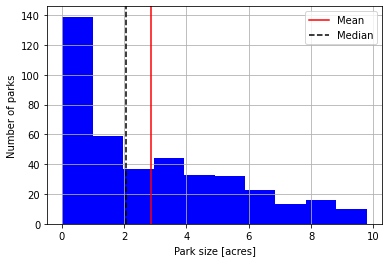

In [9]:
#Plot a histogram of the parks with size less than 10 acres with the mean and median indicated on the plot
smallparks['ACREAGE'].hist(color='b')
plt.axvline(s_parks_mean, c='r', label='Mean')
plt.axvline(s_parks_med, c='k', linestyle='--', label='Median')
plt.xlabel('Park size [acres]')
plt.ylabel('Number of parks')
plt.legend()


6. Imagine that the reader has no access to my instructions, or to the code. What does this figure show? what should the reader note about the figure?


The distribution again shows that there are many low values and few high values, which again pushes the mean to be slightly higher than the median. 


The parks listed in each row are in some cases subsets of larger parks. The "parent" park is listed under PARENT_NAME. 

The challenge is to visualize the distribution of sizes of the  parent parks. To do that you have to aggregate the parks based on the "PARENT_NAME" value and sum the size of the parks. The methods of the dataframe you want to use are 
```.groupby()```
and 
```.sum()```

In [10]:
# Grouping the Parks based on the parent name
group_park = pparks.groupby(['PARENT_NAME']).sum()
group_park

,OBJECTID,DPP_ASSET_ID,ZIP_CODE,ACREAGE,PPR_DISTRICT,Shape__Area,Shape__Length
PARENT_NAME,,,,,,,
10th and Lemon Playground,22,2914,19123,0.218885,0.0,1509.675781,169.494221
11th and Cecil B Moore Playground,164,1135,19122,5.181666,0.0,35754.375000,755.891229
12th and Cambria Playground,242,1800,19133,2.337374,0.0,16136.882812,542.995987
18th and Jackson War Memorial,365,1215,19145,0.083383,0.0,574.429688,148.363162
20th and Tioga Field,273,573,19140,1.195232,0.0,8254.367188,365.439378
...,...,...,...,...,...,...,...
Womrath Park,244,120,19124,2.167680,0.0,14970.460938,591.724807
Wooden Bridge Run,57,1632,19114,49.095667,0.0,339623.484375,4653.000056
Woodside Park,231,1840,19131,2.619728,0.0,18088.925781,615.286813


7 Using **sns.pairplot** plot the pairplot of ACREAGE	and Shape__Area variables. What is the relationship that you can see?

In [11]:
# Plotting pairplot 

pair = ['ACREAGE', 'Shape__Area']
pair

['ACREAGE', 'Shape__Area']

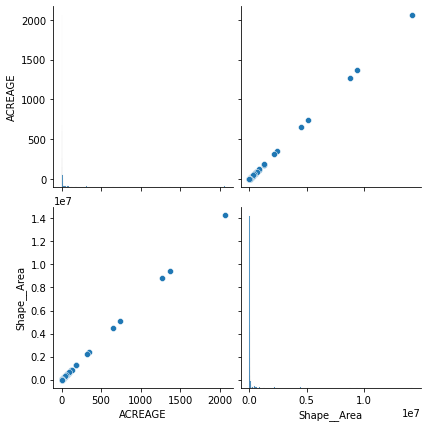

In [14]:
sns.pairplot(group_park[pair], height=3.0)

In [15]:
#Visualize the distribution of the parks grouped by parent name 
# Calculate mean and median
groupmean = group_park['ACREAGE'].mean()
groupmedian = group_park['ACREAGE'].median()
print('The Mean of the grouped Parks is:', groupmean.round(1))
print('The Median of the grouped Parks is:', groupmedian.round(1))

The Mean of the grouped Parks is: 25.9
The Median of the grouped Parks is: 2.9


8. Visualize the distribution of the parks grouped by parent name

<ipython-input-21-30896c3f8ba4>:7: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([groupmean, groupmedian], labels = ['mean', 'median'])


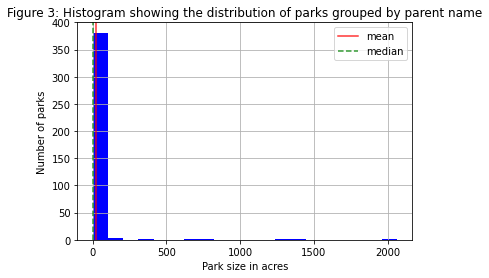

In [21]:
#Visualize the distribution of the parks grouped by parent name

ax = group_park['ACREAGE'].hist(color='blue', bins=20)

ax.axvline(groupmean, color='red', linestyle='solid', linewidth=1.5, alpha = .8)
ax.axvline(groupmedian, color='green', linestyle='--', linewidth=1.5, alpha = .8)
ax.legend([groupmean, groupmedian], labels = ['mean', 'median'])
ax.set_xlabel('Park size in acres')
ax.set_ylabel('Number of parks')

pylab.title('Figure 3: Histogram showing the distribution of parks grouped by parent name');

9. Explain what the graph means

It means that most of the parks sizes are distributed around 100 acres when they are grouped by parent names (the previous plots were distributed around a much smaller acreage). 

10. What could you measure about this new dataset obtained by grouping the data by PARENT_NAME that would allow you to investigate further the difference in the two dataset? 

In [23]:
# Measuring the standard deviation of the group parks

group_std = group_park['ACREAGE'].std().round(1)

print ("The standard deviation of the grouped data set is", group_std)

The standard deviation of the grouped data set is 150.7


This standard deviation of the grouped dataset is way too large compared to the the original dataset. This potentially mean that there is more deviation or spread of the data when the parks are grouped by parent name.

**END OF HOMEWORK**



